# Portfolio assignment week 5
Today, we will use classification metrics to evaluate the performance of several classification models.
Classification metrics are used to assess the effectiveness of a classification model. These metrics indicate how well the model is performing in terms of correctly predicting class labels for a given collection of data.

We'll use the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) for this: AUC-ROC is a performance statistic that assesses a model's ability to distinguish between positive and negative events across a range of probability thresholds. The area under the curve of the Receiver Operating Characteristic (ROC) curve, which displays the true positive rate against the false positive rate, is calculated.

In [ ]:
# moduls 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn import svm
import yaml 
from sklearn.linear_model import LogisticRegression
plt.style.use("dark_background")

# Data
We will make use of the breast cancer data. 
This data is ideal for this type of study because it just contains two classes that we can categorize based on the qualities provide.
firs we going to check a view things:

- NAN values
- correlation
- shape of the data 
- scaling the data

#### loading and preprocces the data

In [3]:
# load the data in with the config file with yaml.safe.load
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["cancer"])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
IsNa = {}
for col in df.columns:
    frac = (df[col].isna().sum() / len(df[col])) * 100
    IsNa[col] = frac 
# no na found in data set
# print(IsNa) # comment out because of the clutter
print(df.shape)
# print(df.dtypes)

{'id': 0.0, 'diagnosis': 0.0, 'radius_mean': 0.0, 'texture_mean': 0.0, 'perimeter_mean': 0.0, 'area_mean': 0.0, 'smoothness_mean': 0.0, 'compactness_mean': 0.0, 'concavity_mean': 0.0, 'concave points_mean': 0.0, 'symmetry_mean': 0.0, 'fractal_dimension_mean': 0.0, 'radius_se': 0.0, 'texture_se': 0.0, 'perimeter_se': 0.0, 'area_se': 0.0, 'smoothness_se': 0.0, 'compactness_se': 0.0, 'concavity_se': 0.0, 'concave points_se': 0.0, 'symmetry_se': 0.0, 'fractal_dimension_se': 0.0, 'radius_worst': 0.0, 'texture_worst': 0.0, 'perimeter_worst': 0.0, 'area_worst': 0.0, 'smoothness_worst': 0.0, 'compactness_worst': 0.0, 'concavity_worst': 0.0, 'concave points_worst': 0.0, 'symmetry_worst': 0.0, 'fractal_dimension_worst': 0.0}
(569, 32)


#### Correlation check
When features do not correlate, it is easier to classify data. 
The rationale for this is that if an object has distinguishing characteristics, it is easier to classify it.
When some traits link with several items, classifying a single object becomes challenging.

<Axes: >

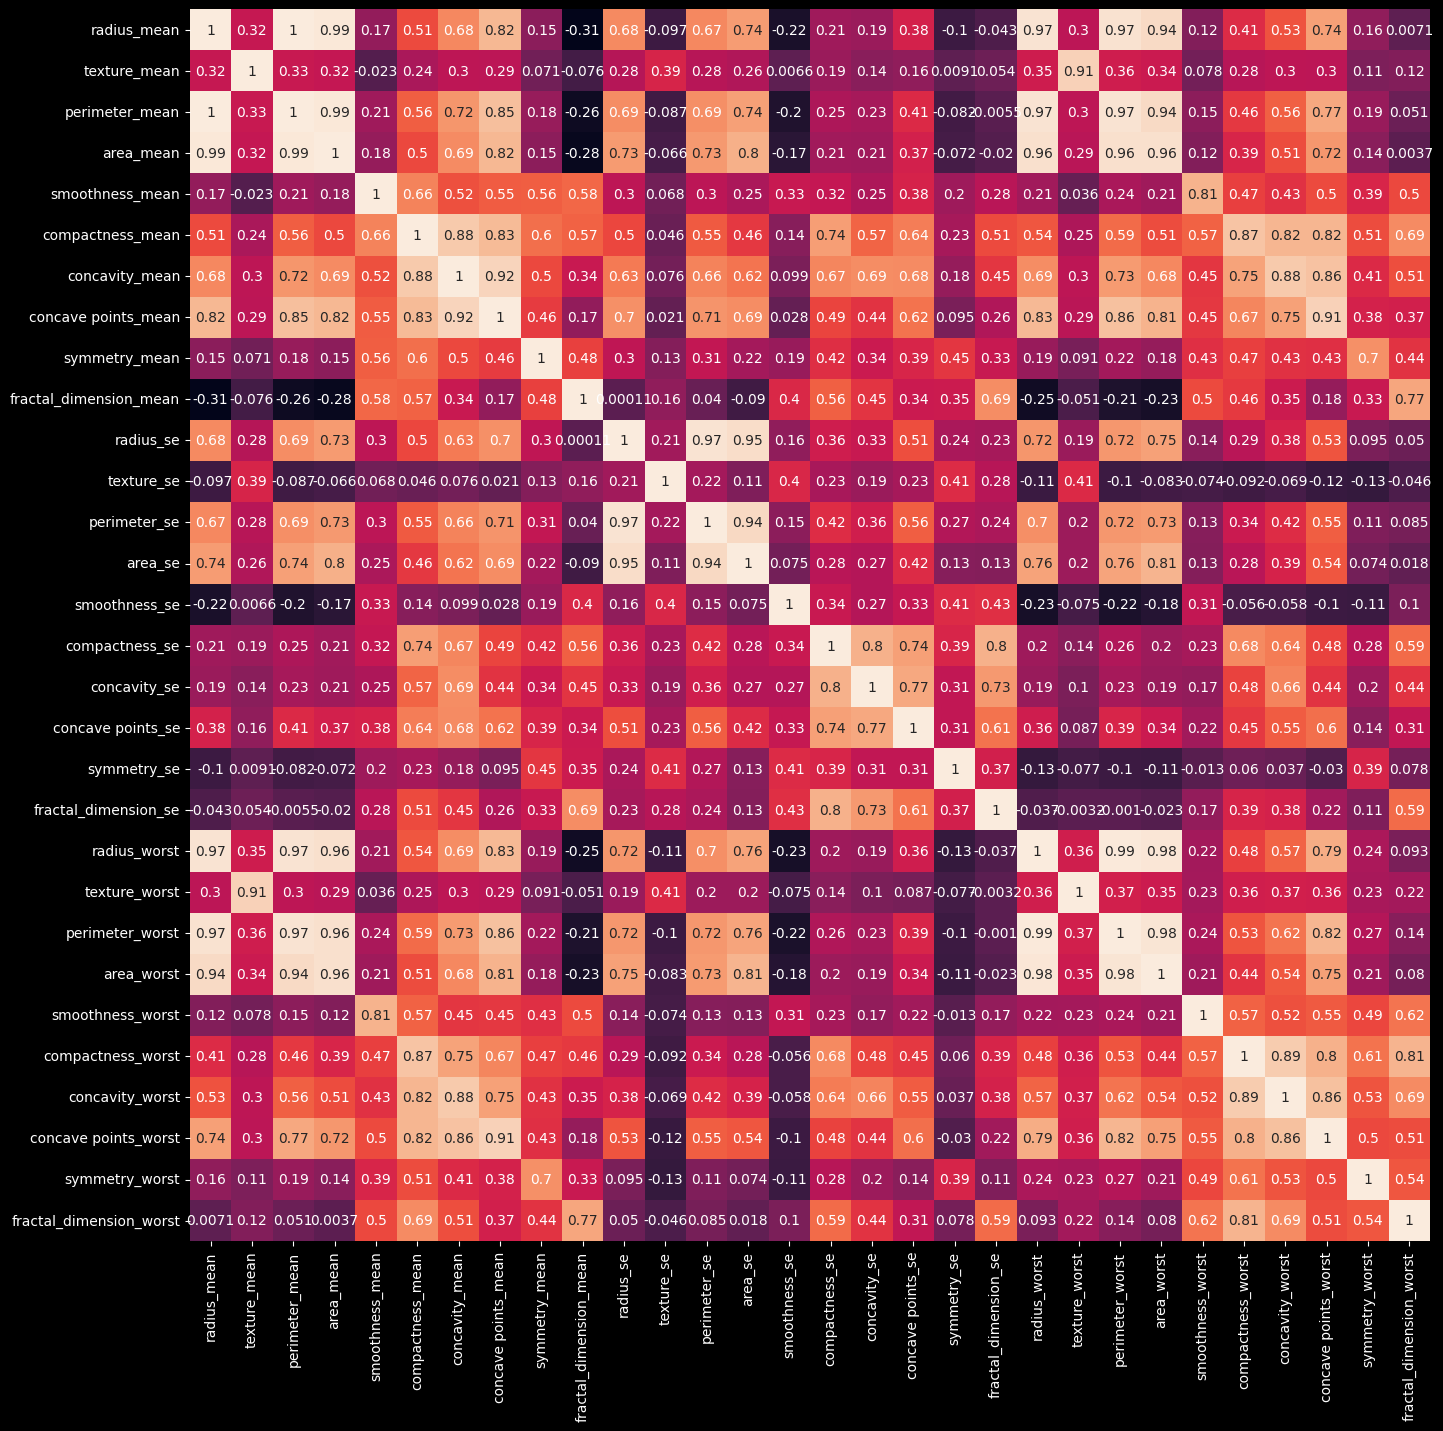

In [6]:
# showing correlation with an R
plt.figure(figsize=(16, 16))
df_cor = df.drop(columns=["id","diagnosis"])
matrix = df_cor.corr()
sns.heatmap(matrix,annot=True,cbar=False)

Certain columns, as we can see, correlate, but because we have a big number of columns, it may be safe to proceed without deleting columns.
In this scenario, for example, we have 30 characteristics. If you only have ten features and three of them correlate, it may be best to remove one of the three related features but in our case we have a lot of features so there is no need to delete them.

# Train and test
To classify the data, we will utilize three distinct classifiers.

- LogisticRegression:
                    Logistic Regression is a well-known classification approach for forecasting categorical outcomes. Despite its name, it is a classification model rather than a regression model. Based on a collection of input variables or features, logistic regression models the probability of binary or multi-class outcomes.

- SVM:
        The Support Vector Machine (SVM) is a widely used machine learning technique for classification and regression tasks. SVM is a binary classifier that seeks to discover an ideal hyperplane that separates data points of various classes with the greatest margin.
    
- KNeighborsClassifier:
                        The K-Nearest Neighbors (KNN) classifier is a supervised machine learning technique that is used to classify data. It is a non-parametric method for making predictions in the feature space based on the k nearest training examples.



In [7]:
# before we delete coloumns we dont need we can just use everything
y = df["diagnosis"]
X = df.drop(columns=["id","diagnosis"])
X_train, X_test, y_train, y_test = train_test_split(X,y)

# machine learning (learing the machine (LOL) )

In [8]:
# train the model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
svm = svm.SVC()
svm.fit(X_train,y_train)
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

C:\Users\marsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

# Plotting the area under the curve
The package that we will use for plotting this is RocCurveDisplay. The area under the curve represents the model's accuracy. This will be different for each of the models we've used.


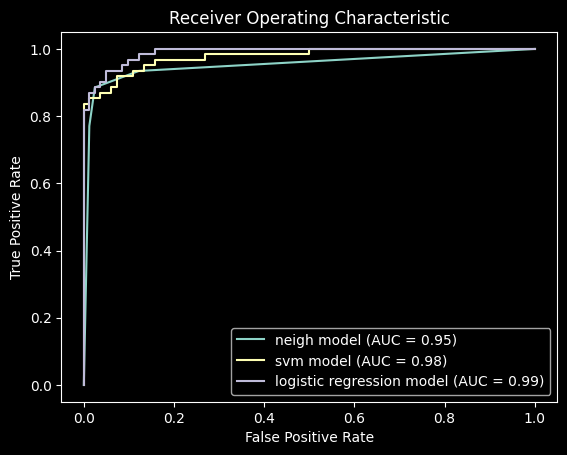

In [9]:
neigh_plot = RocCurveDisplay.from_estimator(neigh, X_test, y_test)
plt.close()
dvm_plot = RocCurveDisplay.from_estimator(svm, X_test, y_test)
plt.close()
lr_plot = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.close()

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the ROC curves on the same axis
neigh_plot.plot(ax=ax, name='neigh model')
dvm_plot.plot(ax=ax, name='svm model')
lr_plot.plot(ax=ax, name='logistic regression model')

# Add labels and a legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

# Display the plot
plt.show()

# Conclusion
As we can see, the models' accuracy is very good, but the logistic regression model is the best with an AUC of 0.99. The ROC curve compares the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold values. The TPR (also known as sensitivity or recall) is the percentage of accurately anticipated positive instances out of all actual positive instances. The FPR denotes the fraction of wrongly predicted negative events among all actual negative events. meaning that the logisctic model is very good of predicting the class of the object based on the features givin to it.